In [29]:
import pandas as pd
import numpy as np
from pyowm.owm import OWM
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
import requests
import json
from datetime import datetime

In [23]:
#url_1 = "http://api.openweathermap.org/data/2.5/forecast?lat=18.990713&lon=73.116844&cnt=200&appid=98e027721603ca32cead5457312b406a"

In [25]:
#response1 = requests.get(url_1)

In [26]:
#json1 = response1.json()

In [27]:
#data1 = json1['list']
#data1[0]

{'dt': 1701140400,
 'main': {'temp': 298.77,
  'feels_like': 299.53,
  'temp_min': 298.06,
  'temp_max': 298.77,
  'pressure': 1012,
  'sea_level': 1012,
  'grnd_level': 1011,
  'humidity': 82,
  'temp_kf': 0.71},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'clouds': {'all': 1},
 'wind': {'speed': 1.44, 'deg': 54, 'gust': 1.41},
 'visibility': 10000,
 'pop': 0.08,
 'sys': {'pod': 'd'},
 'dt_txt': '2023-11-28 03:00:00'}

In [4]:
#cities = pd.read_excel('cities_list.xlsx')
#cities.head(3)

,name,lon,lat,country
0,Abidjan,-4.00167,5.35444,Ivory Coast
1,Abu Dhabi,54.39696,24.45118,United Arab Emirates
2,Abuja,7.49508,9.05785,Nigeria


In [15]:
#cities = pd.read_excel('cities_list.xlsx')
#cities = ["San Francisco", "Chicago", "Miami", "Austin", "New York"]
#maxtemp = []
#mintemp = []
#humidity = []
#weather = []
#windspeed = []
#select_cities = []

#for city_names in cities:
    
#    url = f'http://api.openweathermap.org/data/2.5/weather?q={city_names}&APPID={API_key}&units=imperial'
    
#    r = requests.get(url)
    
    #if (r.status_code == 200):
        
#    data = r.json()
        
#    formatted_json = json.dumps(data, sort_keys = True, indent = 4)

#    select_cities.append(data['name'])
    #name = data['name']
#    maxtemp.append(data['main']['temp_max'])
#    mintemp.append(data['main']['temp_min'])
#    humidity.append(data['main']['humidity'])
#    weather.append(data['weather'][0]['description'])
#    windspeed.append(data['wind']['speed'])
        

#cities_weather_df = pd.DataFrame()
#cities_weather_df['Names'] = select_cities
#cities_weather_df['Max_Temp'] = maxtemp
#cities_weather_df['Min_Temp'] = mintemp
#cities_weather_df['Humidity'] = humidity
#cities_weather_df['Weather'] = weather
#cities_weather_df['WindSpeed'] = windspeed

#cities_weather_df  

,Names,Max_Temp,Min_Temp,Humidity,Weather,WindSpeed
0,San Francisco,51.89,45.41,91,broken clouds,8.99
1,Chicago,34.29,28.62,63,clear sky,10.36
2,Miami,71.02,63.00,70,broken clouds,8.05
3,Austin,59.02,53.76,59,overcast clouds,6.91
4,New York,36.84,31.75,50,clear sky,12.66


In [11]:
sf = pd.read_csv("../data/2014-present-sf.csv", header = 2)

In [12]:
sf.head(2)

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),wind_speed_10m_max (km/h)
0,2014-01-01,1,17.0,6.3,9.9,2014-01-01T15:25,2014-01-02T01:01,0.0,10.5
1,2014-01-02,1,18.4,3.9,10.3,2014-01-02T15:25,2014-01-03T01:02,0.0,10.9


In [13]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       3615 non-null   object 
 1   weather_code (wmo code)    3615 non-null   int64  
 2   temperature_2m_max (°C)    3615 non-null   float64
 3   temperature_2m_min (°C)    3615 non-null   float64
 4   temperature_2m_mean (°C)   3615 non-null   float64
 5   sunrise (iso8601)          3615 non-null   object 
 6   sunset (iso8601)           3615 non-null   object 
 7   precipitation_sum (mm)     3615 non-null   float64
 8   wind_speed_10m_max (km/h)  3615 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 254.3+ KB


In [14]:
sf["time"]=pd.to_datetime(sf["time"])

In [15]:
sf.set_index("time", inplace=True)

In [24]:
sf.rename(columns={"sunrise (iso8601)": "sunrise", "sunset (iso8601)": "sunset", 
                   "temperature_2m_mean (°C)": "mean_temp",
                   "temperature_2m_max (°C)" : "max_temp",
                    "temperature_2m_min (°C)" : "min_temp" },
          inplace = True)

In [17]:
sf["sunrise"]=pd.to_datetime(sf["sunrise"])
sf["sunset"]=pd.to_datetime(sf["sunset"])

In [18]:
sf["sunset"]

time
2014-01-01   2014-01-02 01:01:00
2014-01-02   2014-01-03 01:02:00
2014-01-03   2014-01-04 01:03:00
2014-01-04   2014-01-05 01:04:00
2014-01-05   2014-01-06 01:04:00
                     ...        
2023-11-20   2023-11-21 00:55:00
2023-11-21   2023-11-22 00:54:00
2023-11-22   2023-11-23 00:54:00
2023-11-23   2023-11-24 00:53:00
2023-11-24   2023-11-25 00:53:00
Name: sunset, Length: 3615, dtype: datetime64[ns]

In [19]:
#add location field for future updates
sf["location"] = "SF"

<Axes: xlabel='time'>

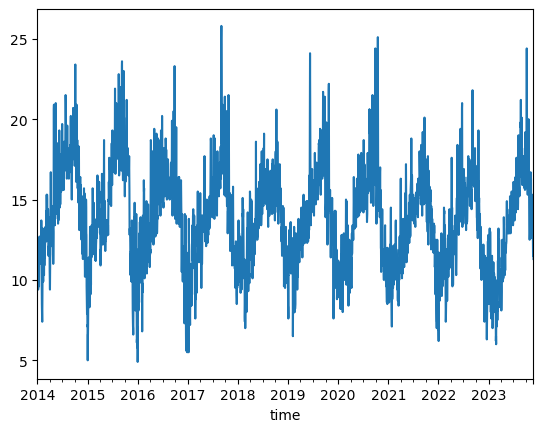

In [25]:
sf["mean_temp"].plot()

<Axes: xlabel='time'>

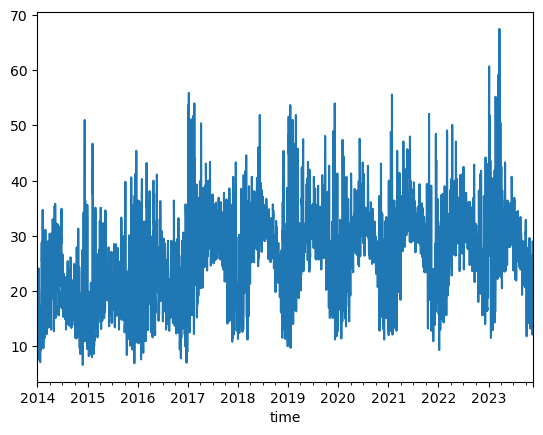

In [21]:
sf["wind_speed_10m_max (km/h)"].plot()

<Axes: xlabel='time'>

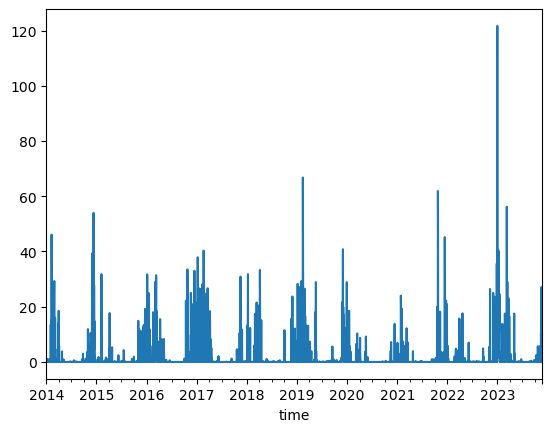

In [22]:
sf["precipitation_sum (mm)"].plot()

Looking at stationarity in the data - average temperature

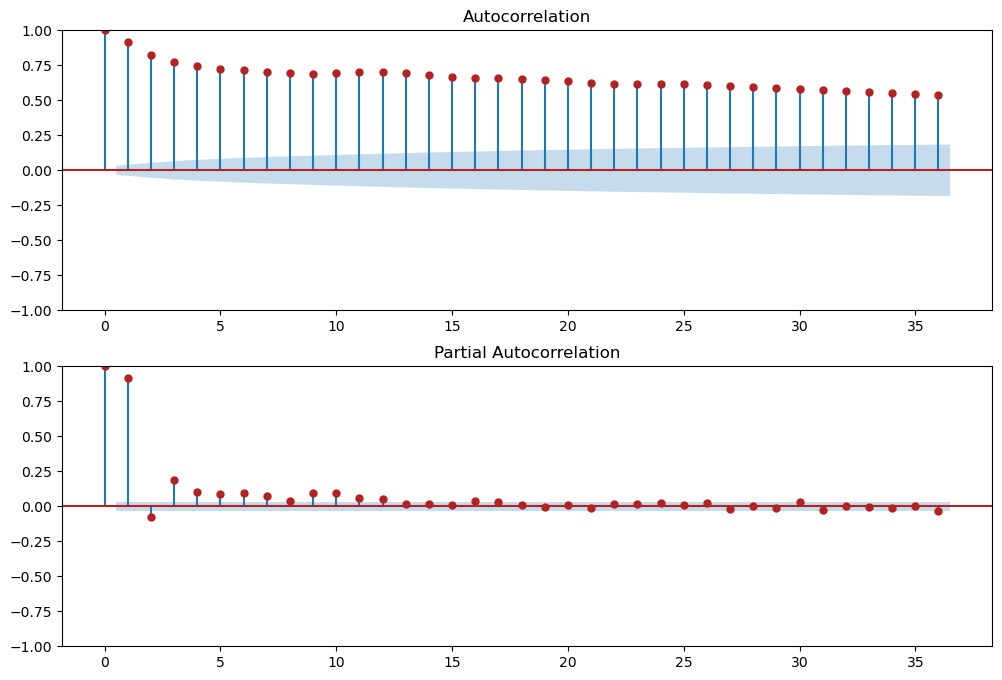

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sf.mean_temp, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sf.mean_temp, ax=ax2,color='firebrick')

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

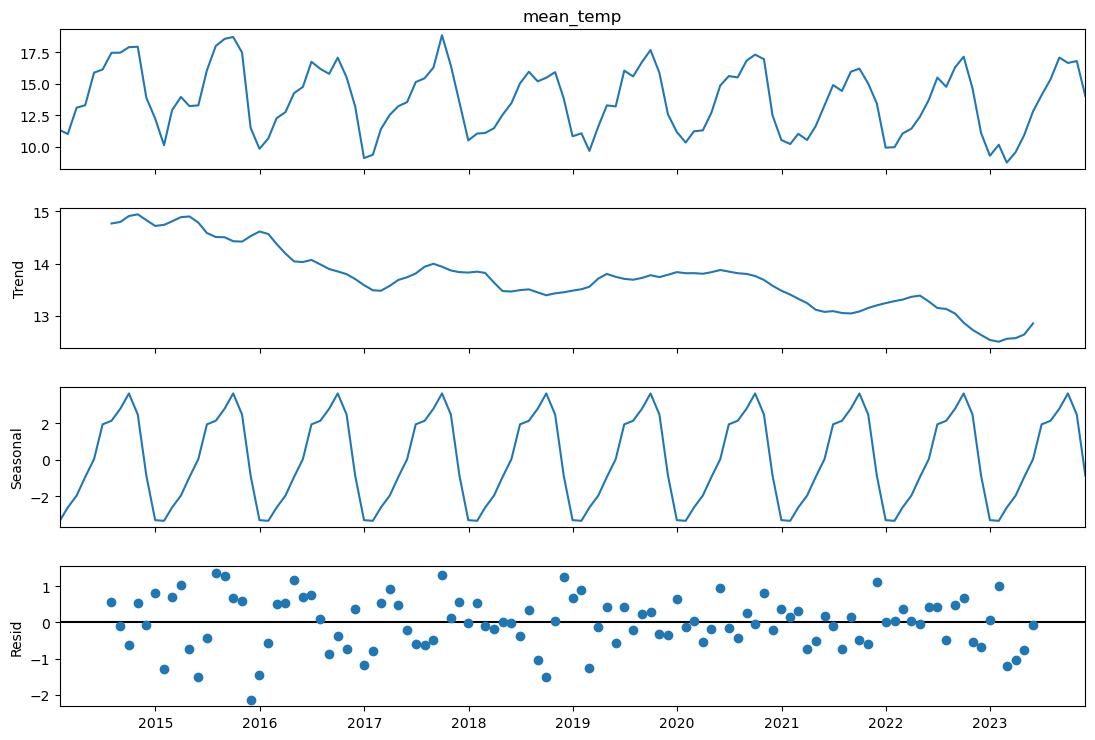

In [39]:
decompose  = seasonal_decompose(sf["mean_temp"].resample('M').mean())
fig = plt.figure()
fig = decompose.plot()
fig.set_size_inches(12,8)

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
result = adfuller(sf.mean_temp)
print('ADF: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF: -4.431798784780346
p-value: 0.00026064311085461424
Critical Values:
	1%: -3.432168780296152
	5%: -2.8623436353134553
	10%: -2.5671977878575616


Looks like the mean temperature data is non-stationary.

Looking at stationarity in the data - precipitation

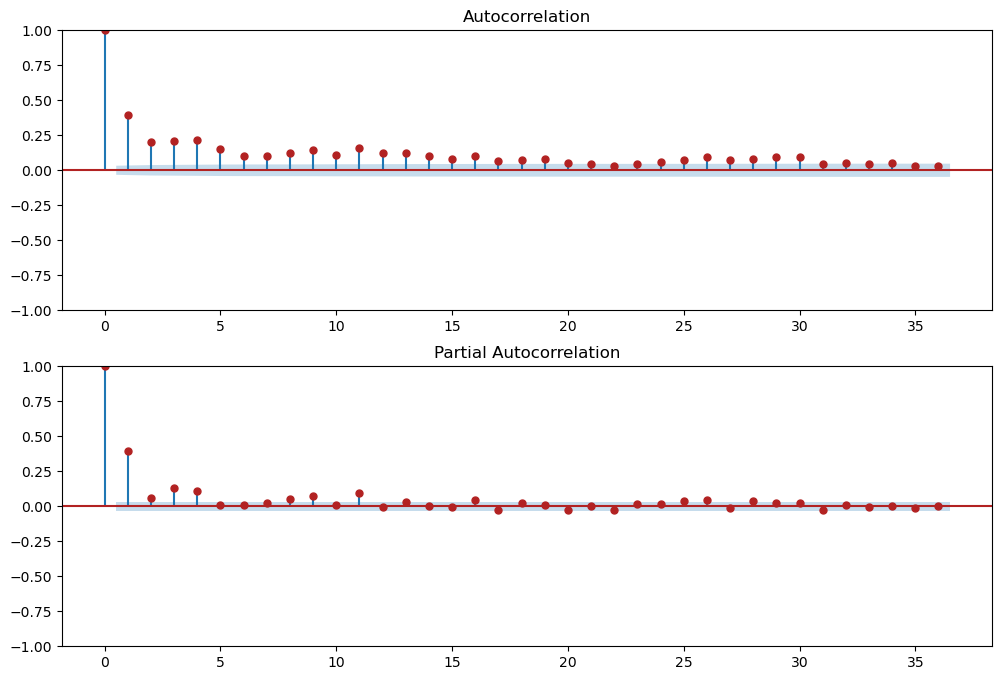

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sf["precipitation_sum (mm)"], ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sf["precipitation_sum (mm)"], ax=ax2,color='firebrick')

In [40]:
result_prec = adfuller(sf["precipitation_sum (mm)"])
print('ADF: {}'.format(result_prec[0]))
print('p-value: {}'.format(result_prec[1]))
print('Critical Values:')
for key, value in result_prec[4].items():
    print('\t{}: {}'.format(key, value))

ADF: -7.51799498183653
p-value: 3.8573460973879514e-11
Critical Values:
	1%: -3.4321758900049346
	5%: -2.8623467758032257
	10%: -2.567199459754788


Looking at stationarity in the data - wind speed

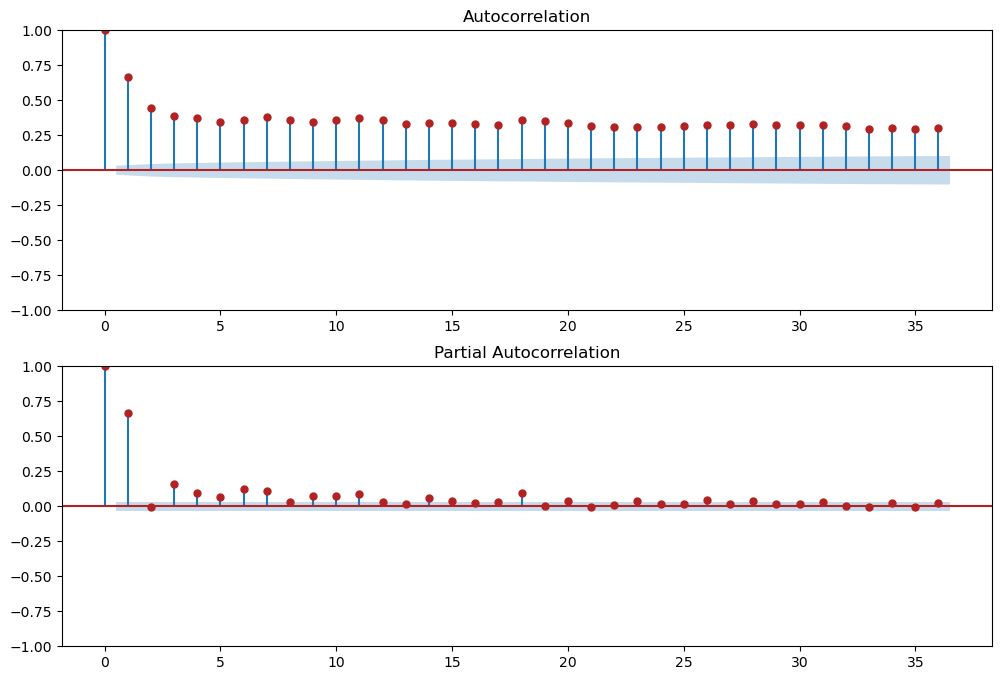

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sf["wind_speed_10m_max (km/h)"], ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sf["wind_speed_10m_max (km/h)"], ax=ax2,color='firebrick')

In [41]:
result_wind = adfuller(sf["wind_speed_10m_max (km/h)"])
print('ADF: {}'.format(result_wind[0]))
print('p-value: {}'.format(result_wind[1]))
print('Critical Values:')
for key, value in result_wind[4].items():
    print('\t{}: {}'.format(key, value))

ADF: -4.247165491686533
p-value: 0.0005477015254386712
Critical Values:
	1%: -3.4321758900049346
	5%: -2.8623467758032257
	10%: -2.567199459754788
